In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
sns.set()

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [2]:
ccdefault = pd.read_csv('ccdefault.csv', sep = ',')
df = ccdefault.drop(['ID'], axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Identify X and y
X = df.drop(['DEFAULT'], axis = 1)
y = df['DEFAULT']
X.shape, y.shape

((30000, 23), (30000,))

In [4]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 43)

In [5]:
# Using a for loop to test multiple values of n_estimators for RandomForestClassifier.
# try n_estimators from 1 to 100 and record test accuracy score

train_score = []
test_score = []

for i in range(1,100):
    rfc = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=10, max_features = 'auto', 
                                min_samples_split = 5, random_state = 43)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    train_score.append(accuracy_score(y_train, rfc.predict(X_train)))  
    test_score.append(accuracy_score(y_test, y_pred))

In [6]:
print('The accuracy score for the train set is ', np.round(train_score, 3))
print("-----------------------------------------")
print('The accuracy score for the test set is ', np.round(test_score, 3))

The accuracy score for the train set is  [0.828 0.838 0.843 0.845 0.846 0.848 0.849 0.849 0.848 0.849 0.849 0.851
 0.85  0.851 0.851 0.852 0.852 0.852 0.852 0.853 0.853 0.853 0.853 0.852
 0.852 0.853 0.853 0.852 0.853 0.852 0.852 0.852 0.852 0.852 0.852 0.852
 0.852 0.851 0.851 0.852 0.851 0.85  0.85  0.85  0.851 0.851 0.851 0.851
 0.851 0.851 0.851 0.851 0.851 0.851 0.851 0.851 0.851 0.851 0.851 0.851
 0.851 0.851 0.851 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852
 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.853
 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852 0.852
 0.852 0.852 0.852]
-----------------------------------------
The accuracy score for the test set is  [0.802 0.8   0.81  0.812 0.814 0.812 0.812 0.811 0.809 0.811 0.811 0.811
 0.812 0.811 0.813 0.81  0.813 0.815 0.815 0.815 0.816 0.817 0.817 0.816
 0.817 0.816 0.814 0.816 0.816 0.816 0.817 0.816 0.816 0.816 0.816 0.817
 0.816 0.817 0.817 0.818 0.819 0.818 0.817 0.818 0.818

In [7]:
print('The mean of accuracy score for the train set is ', np.round(np.mean(train_score), 3))
print('The standard deviation of accuracy score for the train set is ', np.round(np.std(train_score), 3))
print("-----------------------------------------")
print('The mean of accuracy score for the test set is ', np.round(np.mean(test_score), 3))
print('The standard deviation of accuracy score for the test set is ', np.round(np.std(test_score), 3))

The mean of accuracy score for the train set is  0.851
The standard deviation of accuracy score for the train set is  0.003
-----------------------------------------
The mean of accuracy score for the test set is  0.816
The standard deviation of accuracy score for the test set is  0.003


In [8]:
# Compute time
%time rfc.fit(X_train, y_train)

Wall time: 3.69 s


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=99,
                       random_state=43)

In [9]:
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators = 99, criterion='gini', max_depth = 10, max_features = 'auto', 
                                min_samples_split = 5, random_state =43)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1 PAY_2                          0.265583
 2 PAY_3                          0.116084
 3 PAY_5                          0.063156
 4 PAY_4                          0.060245
 5 PAY_AMT2                       0.040620
 6 BILL_AMT1                      0.038429
 7 SEX                            0.037351
 8 PAY_6                          0.037190
 9 BILL_AMT2                      0.032966
10 BILL_AMT3                      0.031730
11 PAY_AMT3                       0.031232
12 BILL_AMT4                      0.026737
13 PAY_AMT5                       0.026567
14 BILL_AMT5                      0.026249
15 PAY_AMT1                       0.026133
16 PAY_AMT4                       0.025897
17 BILL_AMT6                      0.025620
18 PAY_0                          0.024805
19 DEFAULT                        0.024321
20 PAY_AMT6                       0.023138
21 MARRIAGE                       0.007932
22 AGE                            0.004601
23 EDUCATION                      0.003414


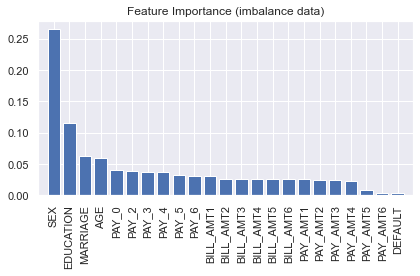

In [10]:
plt.title('Feature Importance (imbalance data)')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [11]:
print("The mean for the train set score is:")
print(np.round(np.mean(forest.predict(X_train)), 3))
print("The mean for the test set score is:")
print(np.round(np.mean(y_pred_forest), 3))
print("-----------------------------------------")
print("The standard deviation for the train set score is:")
print(np.round(np.std(forest.predict(X_train)), 3))
print("The standard deviation for the test set score is:")
print(np.round(np.std(y_pred_forest), 3))

The mean for the train set score is:
0.121
The mean for the test set score is:
0.114
-----------------------------------------
The standard deviation for the train set score is:
0.326
The standard deviation for the test set score is:
0.318


In [12]:
# Confusion Matrix
conmatrix = confusion_matrix(y_test, y_pred_forest)
conmatrix = pd.DataFrame(conmatrix, 
              columns = ['pred_class 0 ', 'pred_class 1'], 
              index = ['actual_class 0', 'actual_class 1']
              )
print(conmatrix)

                pred_class 0   pred_class 1
actual_class 0           2224           112
actual_class 1            433           231


In [13]:
# Classification Report
target = ['class 0 (non-defaults)','class 1 (defaults)']
report = classification_report(y_test, y_pred_forest, target_names = target)
print(report)

                        precision    recall  f1-score   support

class 0 (non-defaults)       0.84      0.95      0.89      2336
    class 1 (defaults)       0.67      0.35      0.46       664

              accuracy                           0.82      3000
             macro avg       0.76      0.65      0.67      3000
          weighted avg       0.80      0.82      0.80      3000



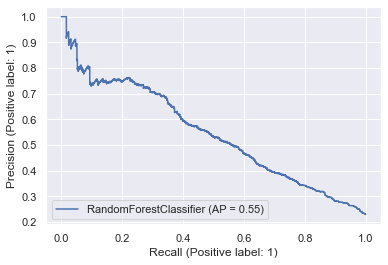

In [14]:
# Precision-Recall curve
pc = plot_precision_recall_curve(forest, X_test, y_test)

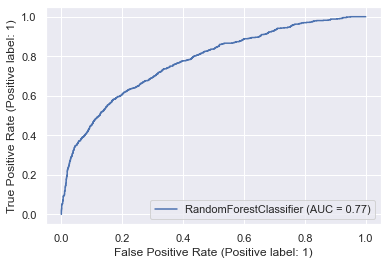

In [15]:
# ROC curve
roc = plot_roc_curve(forest, X_test, y_test)

<ipython-input-16-cb03f57fa181>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-cb03f57fa181>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


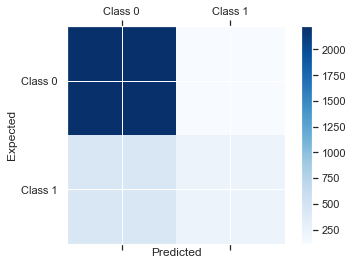

In [16]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test, y_pred_forest), cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# SMOTE for Imbalancing Data

In [17]:
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 21028, 1: 5972})


In [18]:
# transform the dataset
oversample = SMOTE(random_state=12)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)
X_test_SMOTE, y_test_SMOTE = oversample.fit_resample(X_test, y_test)

In [19]:
# summarize the new class distribution
counter_SMOTE = Counter(y_train_SMOTE)
print(counter_SMOTE)

Counter({0: 21028, 1: 21028})


# Hyperparameter tuning for Random Forest

In [20]:
# Using grid search cross validation to select the best parameters

param_grid = {'n_estimators': np.arange(1, 100, 10),
            'max_depth': np.arange(2, 12, 2),
            'min_samples_split': [2, 3, 5],
            'max_features': ["auto", "sqrt", "log2"]}
rf = RandomForestClassifier(random_state = 43)
rf_cv = GridSearchCV(rf, param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)
rf_cv.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=43),
             n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='accuracy')

In [21]:
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best training accuracy score using cv is {}".format(np.round(rf_cv.best_score_, 3)))

Tuned Decision Tree Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 91}
Best training accuracy score using cv is 0.782


In [22]:
rf = RandomForestClassifier(n_estimators = 91, max_depth = 10, max_features = 'auto', 
                            min_samples_split = 5, random_state = 43)
rf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_rf = rf.predict(X_test_SMOTE)
score = np.round(accuracy_score(y_test_SMOTE, y_pred_rf), 3)
print("The accuracy score for test set is ", score)

The accuracy score for test set is  0.779


In [23]:
feat_labels = df.columns[1:]

importances_rf = rf.feature_importances_

indices = np.argsort(importances_rf)[::-1]
for f in range(X_train_SMOTE.shape[1]):
    print("%2d %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances_rf[indices[f]]))

 1 PAY_2                          0.158677
 2 PAY_3                          0.136264
 3 PAY_5                          0.063996
 4 AGE                            0.061818
 5 PAY_4                          0.060303
 6 EDUCATION                      0.057185
 7 PAY_AMT2                       0.044939
 8 PAY_6                          0.039264
 9 PAY_AMT3                       0.038929
10 BILL_AMT2                      0.034518
11 BILL_AMT1                      0.033865
12 SEX                            0.031650
13 PAY_AMT5                       0.030034
14 MARRIAGE                       0.029400
15 PAY_AMT4                       0.026954
16 BILL_AMT3                      0.024466
17 BILL_AMT4                      0.021200
18 DEFAULT                        0.020028
19 BILL_AMT5                      0.019250
20 BILL_AMT6                      0.018077
21 PAY_AMT6                       0.017669
22 PAY_AMT1                       0.016343
23 PAY_0                          0.015170


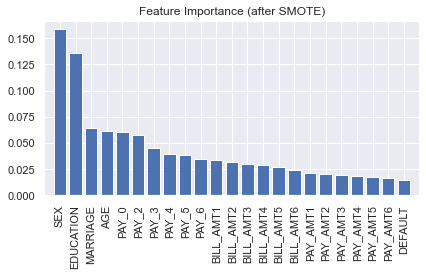

In [24]:
plt.title('Feature Importance (after SMOTE)')
plt.bar(range(X_train_SMOTE.shape[1]), importances_rf[indices], align='center')
plt.xticks(range(X_train_SMOTE.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train_SMOTE.shape[1]])
plt.tight_layout()
plt.show()

In [25]:
# Confusion Matrix
conmatrix = confusion_matrix(y_test_SMOTE, y_pred_rf)
conmatrix = pd.DataFrame(conmatrix, 
              columns = ['pred_class 0 ', 'pred_class 1'], 
              index = ['actual_class 0', 'actual_class 1']
              )
print(conmatrix)

                pred_class 0   pred_class 1
actual_class 0           1956           380
actual_class 1            652          1684


In [26]:
# Classification Report
target = ['class 0 (non-defaults)','class 1 (defaults)']
report = classification_report(y_test_SMOTE, y_pred_rf, target_names = target)
print(report)

                        precision    recall  f1-score   support

class 0 (non-defaults)       0.75      0.84      0.79      2336
    class 1 (defaults)       0.82      0.72      0.77      2336

              accuracy                           0.78      4672
             macro avg       0.78      0.78      0.78      4672
          weighted avg       0.78      0.78      0.78      4672



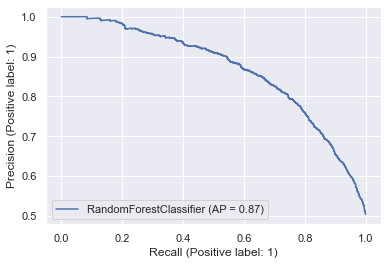

In [27]:
# Precision-Recall curve
pc = plot_precision_recall_curve(rf, X_test_SMOTE, y_test_SMOTE)

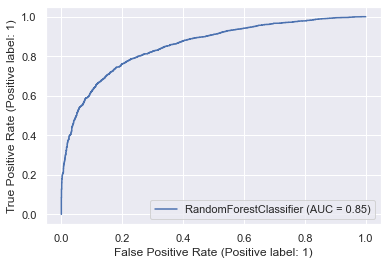

In [28]:
# ROC curve
roc = plot_roc_curve(rf, X_test_SMOTE, y_test_SMOTE)

<ipython-input-29-d988acbd342c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-29-d988acbd342c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


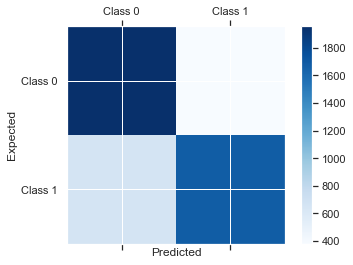

In [29]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test_SMOTE, y_pred_rf), cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [30]:
print("My name is Hui-Erh Chai_Angela")
print("My NetID is: 674939884")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hui-Erh Chai_Angela
My NetID is: 674939884
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
